In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Q1
np.random.seed(42)
data=np.random.randint(1,201,size=(100,30))
df = pd.DataFrame(data, columns=[f'Col{i+1}' for i in range(30)])
print("Original Dataset (first 5 rows):")
print(df.head())


Original Dataset (first 5 rows):
   Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col21  \
0   103   180    93    15   107    72   189    21   103    122  ...     88   
1    89    49    59   170   188    15   190   190   175    190  ...     18   
2    92   111   188   199   172     8   175    35    81    164  ...    146   
3    40    82   111    53    24   154   188   124    41    157  ...    139   
4   135    72    12   162    33    48   151    62    37     99  ...    103   

   Col22  Col23  Col24  Col25  Col26  Col27  Col28  Col29  Col30  
0    158     38    130    192    188     21    161     58     22  
1    132     89     60     14      9     90     53    130     84  
2     44    162    190     14     95     48     15    200    190  
3     81    136    163    163     33    123      5     41     28  
4     27    137     15     90     42    124    179     63     96  

[5 rows x 30 columns]


In [9]:

# Replace all values between [10,60] with NaN
df = df.mask((df >= 10) & (df <= 60))

# Count NAs in each row and column
row_na_count = df.isna().sum(axis=1)
col_na_count = df.isna().sum(axis=0)

print("\nCount of NAs in each row:")
print(row_na_count)

print("\nCount of NAs in each column:")
print(col_na_count)







Count of NAs in each row:
0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

Count of NAs in each column:
Col1     23
Col2     22
Col3     21
Col4     18
Col5     26
Col6     28
Col7     23
Col8     27
Col9     21
Col10    17
Col11    26
Col12    24
Col13    23
Col14    28
Col15    23
Col16    34
Col17    31
Col18    31
Col19    34
Col20    20
Col21    24
Col22    26
Col23    23
Col24    31
Col25    27
Col26    26
Col27    31
Col28    27
Col29    31
Col30    31
dtype: int64


In [10]:
#Q2
# Replace NaN with column mean
df_filled = df.apply(lambda col: col.fillna(col.mean()), axis=0)

print("\nDataset after replacing NAs with column mean (first 5 rows):")
print(df_filled.head())


Dataset after replacing NAs with column mean (first 5 rows):
         Col1        Col2        Col3        Col4        Col5        Col6  \
0  103.000000  180.000000   93.000000  127.792683  107.000000   72.000000   
1   89.000000  124.448718  110.063291  170.000000  188.000000  121.069444   
2   92.000000  111.000000  188.000000  199.000000  172.000000    8.000000   
3  130.116883   82.000000  111.000000  127.792683  120.810811  154.000000   
4  135.000000   72.000000  110.063291  162.000000  120.810811  121.069444   

    Col7        Col8        Col9  Col10  ...       Col21       Col22  \
0  189.0  110.739726  103.000000  122.0  ...   88.000000  158.000000   
1  190.0  190.000000  175.000000  190.0  ...  125.447368  132.000000   
2  175.0  110.739726   81.000000  164.0  ...  146.000000  123.094595   
3  188.0  124.000000  123.556962  157.0  ...  139.000000   81.000000   
4  151.0   62.000000  123.556962   99.0  ...  103.000000  123.094595   

        Col23       Col24       Col25     

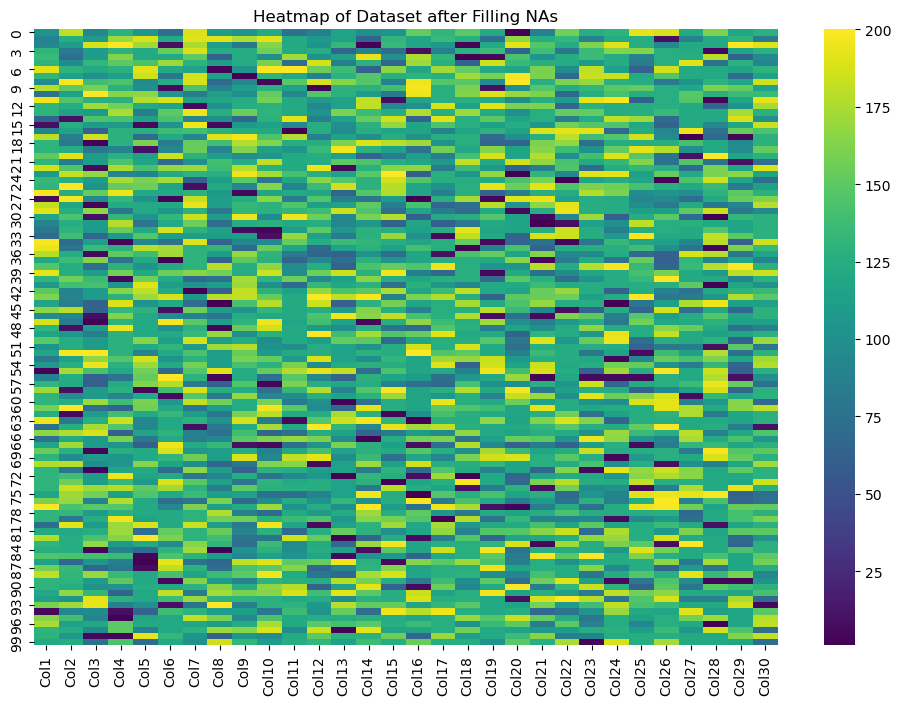

In [11]:
#Q3
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_filled, cmap="viridis", cbar=True)
plt.title("Heatmap of Dataset after Filling NAs")
plt.show()


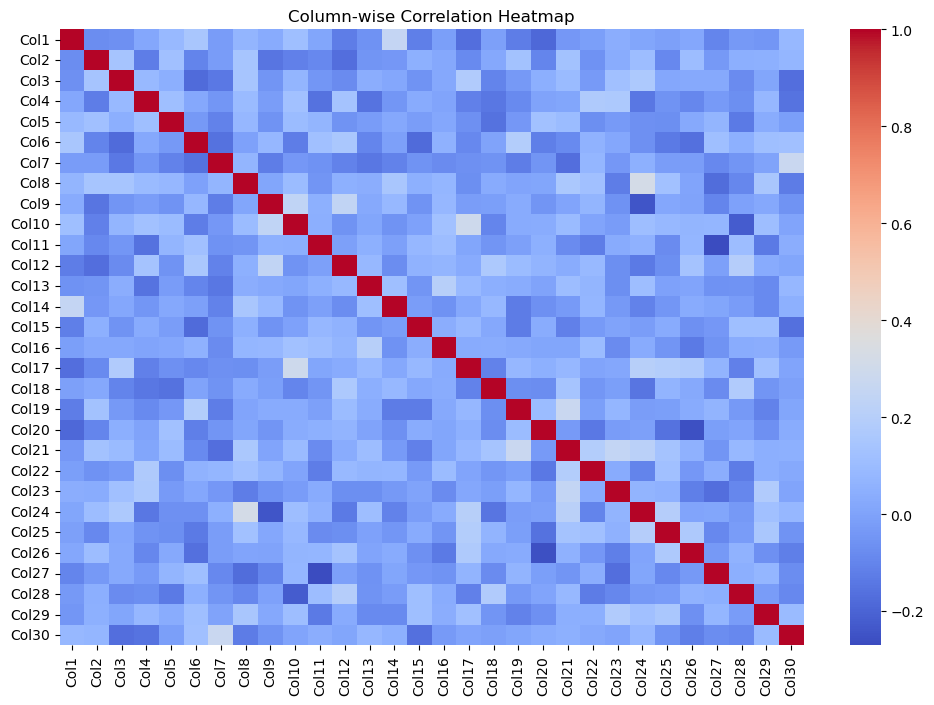

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_filled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("Column-wise Correlation Heatmap")
plt.show()


In [17]:
#Q4
# Compute correlation matrix
corr_matrix = df_filled.corr()

# Count number of columns with correlation <= 0.7
col_low_corr_count = (corr_matrix <= 0.7).sum(axis=0) - 1  # subtract self-correlation
print("\nNumber of low-correlation relationships per column:")
print(col_low_corr_count)

# If you want a single number (how many columns have *all* correlations <= 0.7):
low_corr_columns = (col_low_corr_count == (df_filled.shape[1] - 1)).sum()
print("\nTotal columns with correlation <= 0.7 against all other columns:", low_corr_columns)



Number of low-correlation relationships per column:
Col1     28
Col2     28
Col3     28
Col4     28
Col5     28
Col6     28
Col7     28
Col8     28
Col9     28
Col10    28
Col11    28
Col12    28
Col13    28
Col14    28
Col15    28
Col16    28
Col17    28
Col18    28
Col19    28
Col20    28
Col21    28
Col22    28
Col23    28
Col24    28
Col25    28
Col26    28
Col27    28
Col28    28
Col29    28
Col30    28
dtype: int64

Total columns with correlation <= 0.7 against all other columns: 0


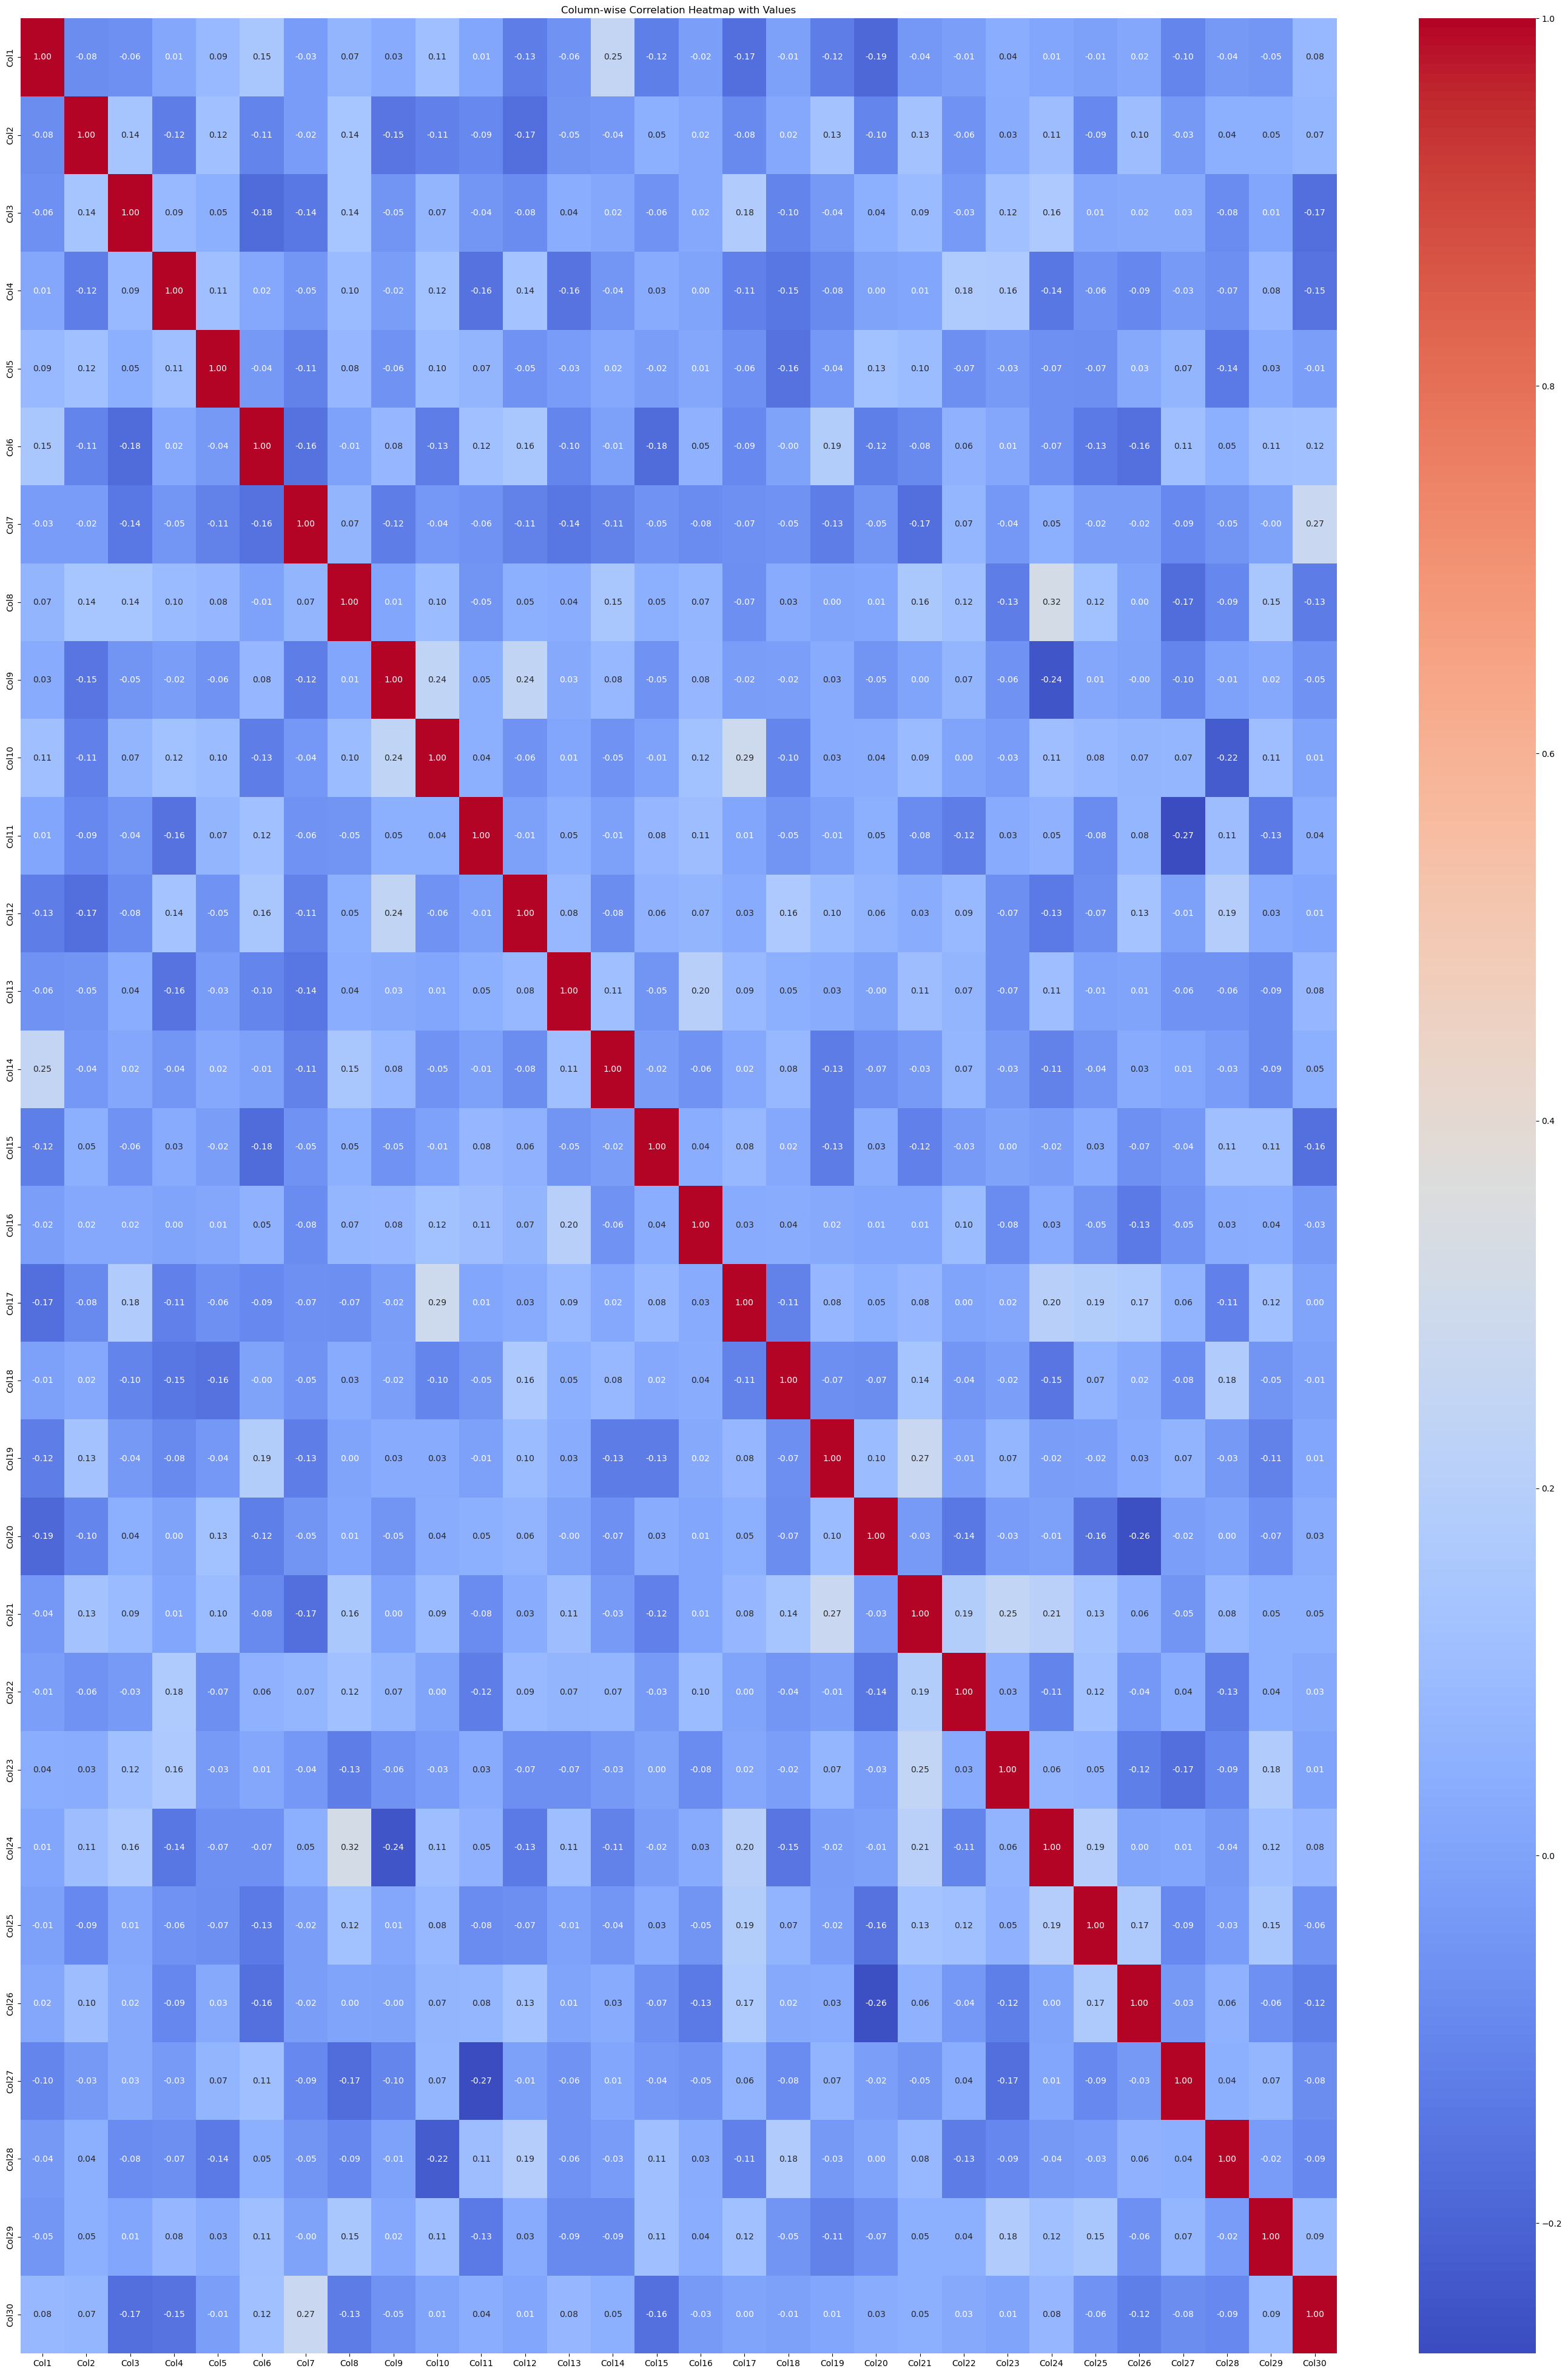

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_filled.corr()

plt.figure(figsize=(35, 50))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Column-wise Correlation Heatmap with Values")
plt.show()


In [13]:
#Q5
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

print("\nFirst 5 rows after Normalization:")
print(df_normalized.head())


First 5 rows after Normalization:
       Col1      Col2      Col3       Col4      Col5      Col6      Col7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

       Col8      Col9     Col10  ...     Col21     Col22     Col23     Col24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  6.233355   

      Col25     Col26     C


First 5 rows after Normalization:
       Col1      Col2      Col3       Col4      Col5      Col6      Col7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

       Col8      Col9     Col10  ...     Col21     Col22     Col23     Col24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  6.233355   

      Col25     Col26     C

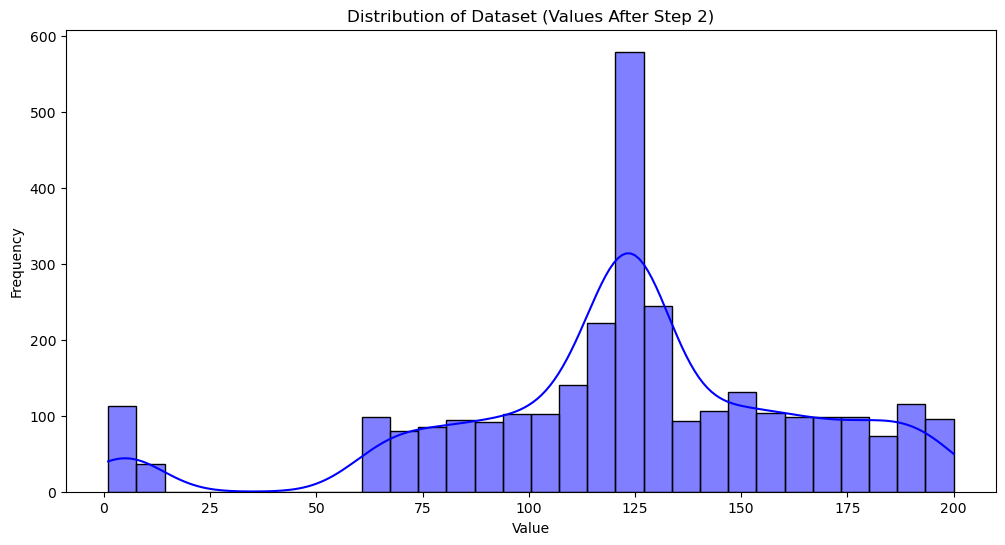

In [15]:
#Q6

df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

print("\nFirst 5 rows after Normalization:")
print(df_normalized.head())
#Q7

# Step 6: Replace values with 0 if <=5 else 1 (using .map)
df_binary = df_normalized.map(lambda x: 0 if x <= 5 else 1)

print("\nFirst 5 rows after Binarization (0/1):")
print(df_binary.head())


# Step 7: Visualizing the distribution of dataset (before normalization)
plt.figure(figsize=(12,6))
sns.histplot(df_filled.values.flatten(), bins=30, kde=True, color="blue")
plt.title("Distribution of Dataset (Values After Step 2)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()